In [1]:
import torch

# 5.1  
# 5.2
## 5.2.1
## 5.2.2

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

## 5.2.3

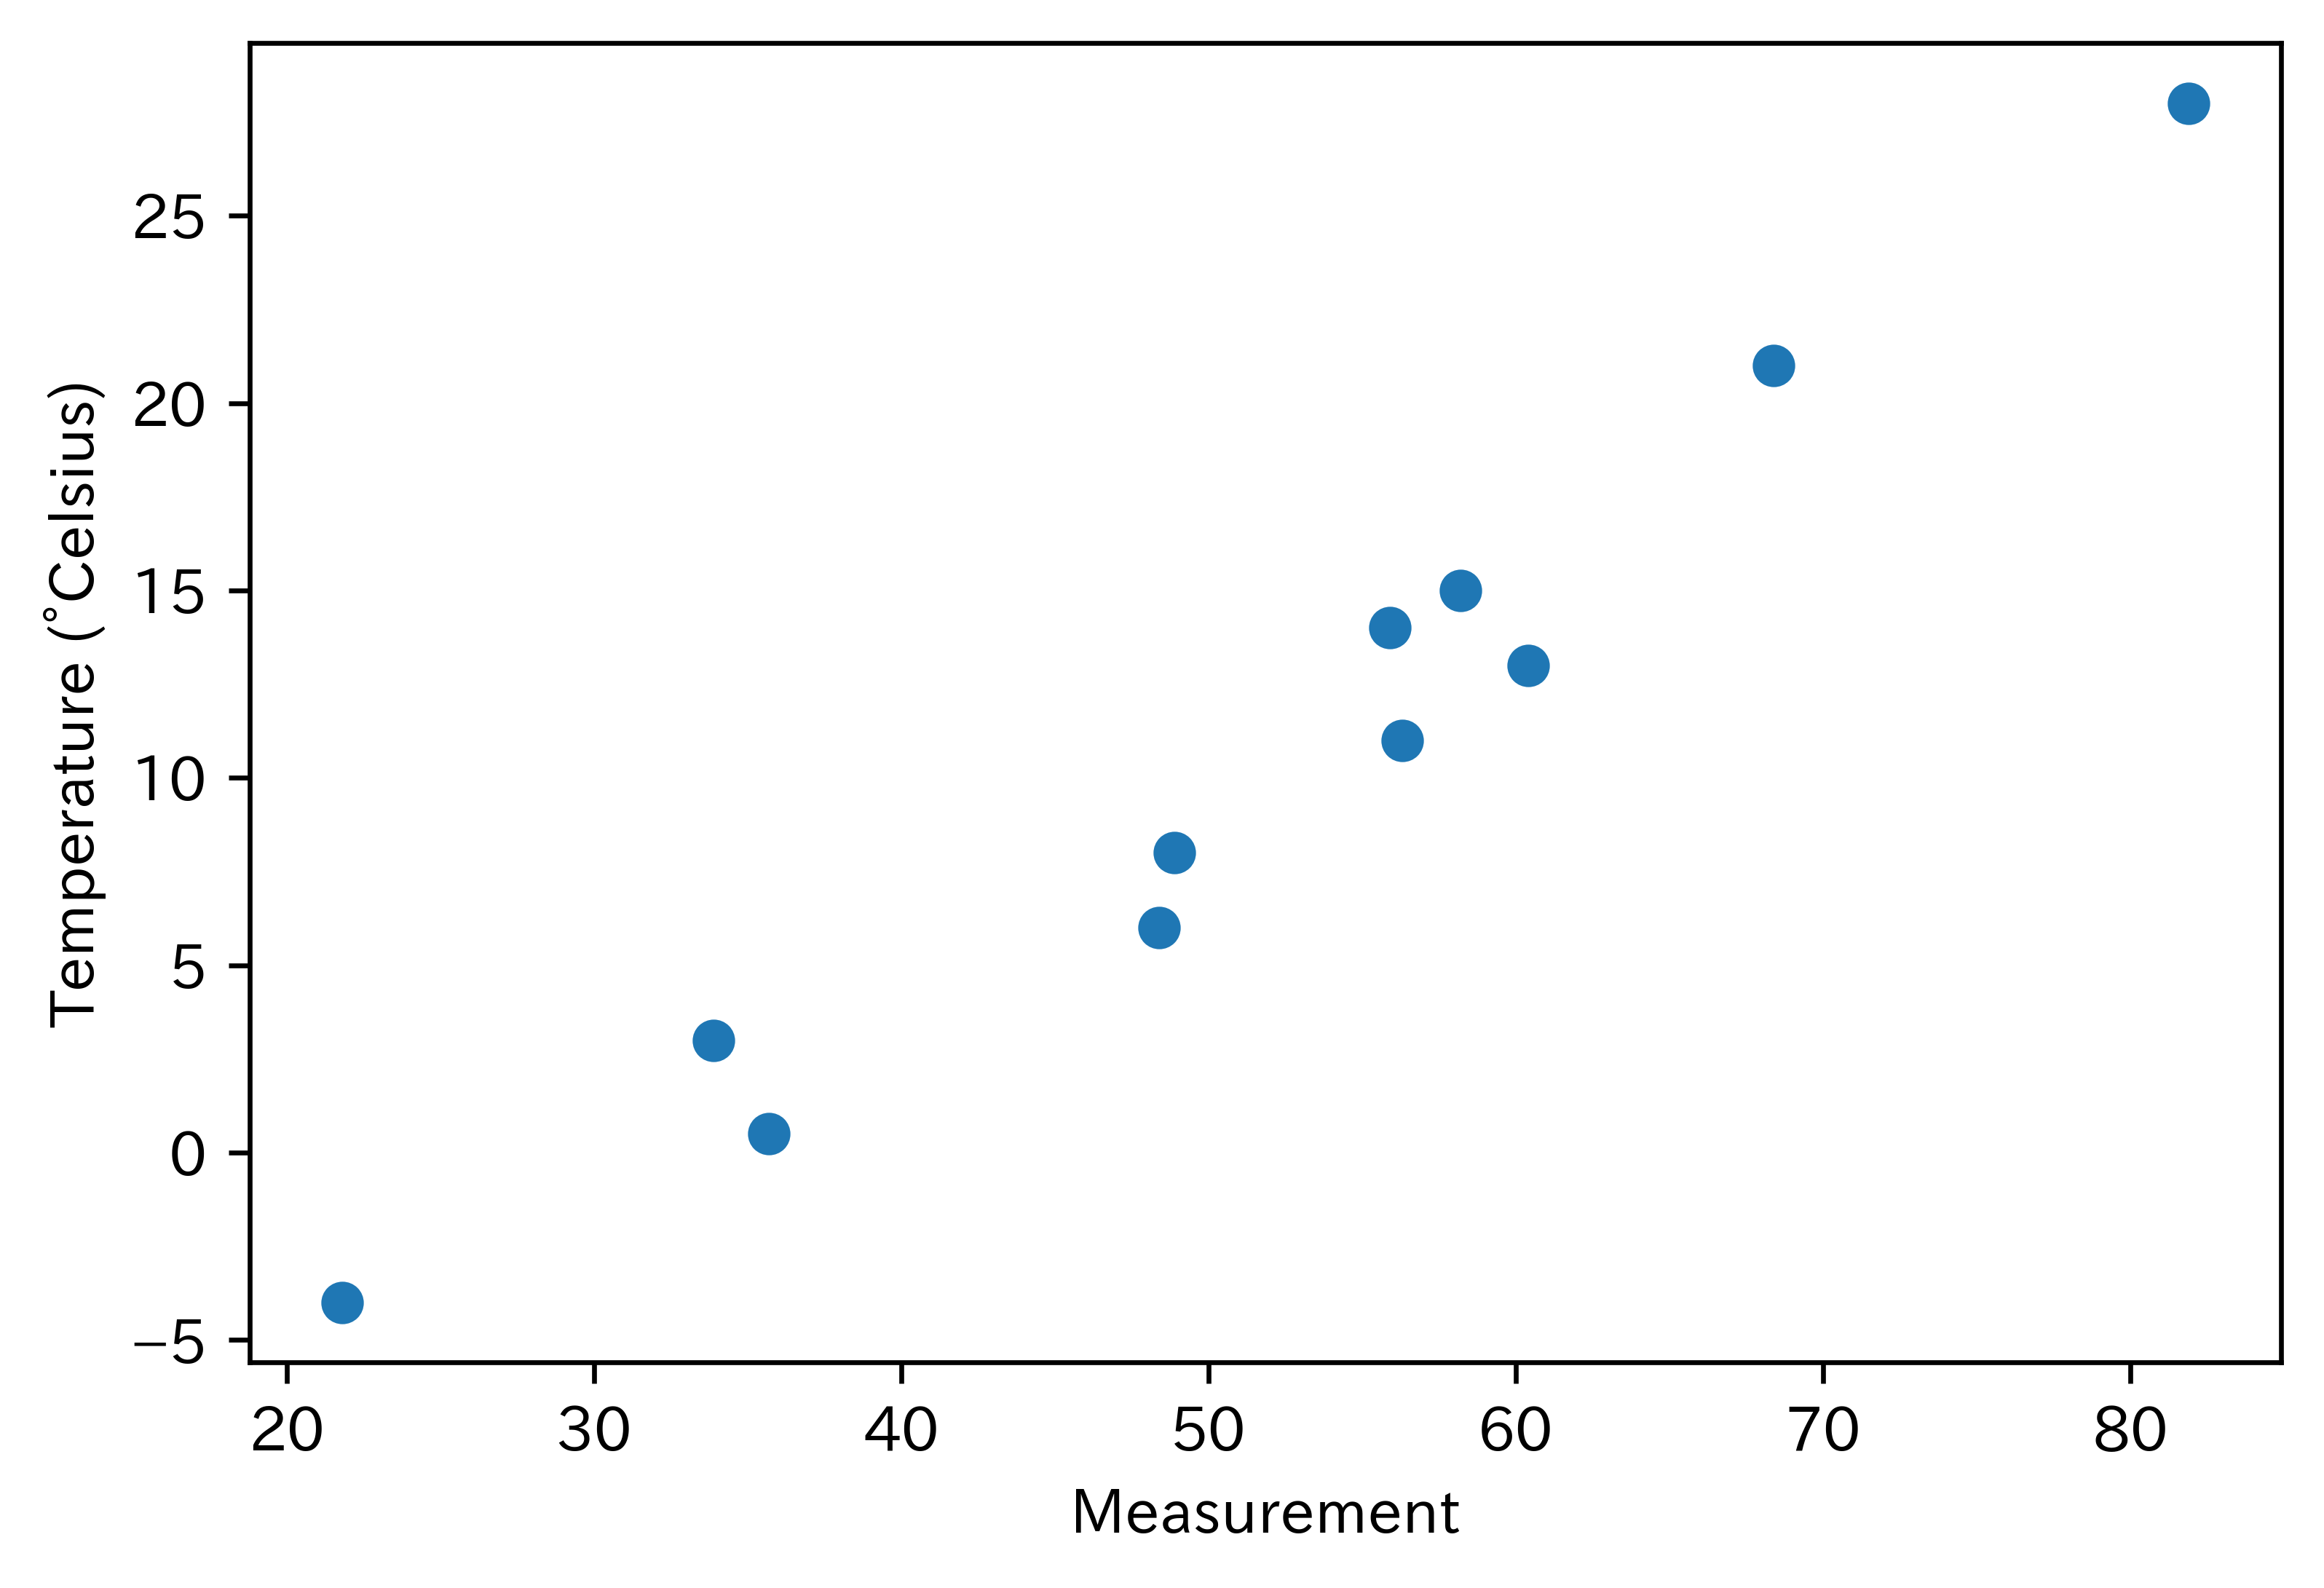

In [3]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

## 5.2.4
# 5.3
## 5.3.1

In [4]:
def model(t_u, w, b):
    return w * t_u + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [8]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")

shapes: x: torch.Size([]), y: torch.Size([3, 1])


In [9]:
print(f" z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


# 5.4
## 5.4.1

In [10]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [11]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [12]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate *loss_rate_of_change_b

In [13]:
# def loss_fn(t_p, t_c):
#     squared_diffs = (t_p - t_c)**2
#     return squared_diffs.mean()

In [35]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [36]:
# def model(t_u, w, b):
#     return w * t_u + b

In [37]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [38]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

# sum()では、モデルの入力ベクトル全体に対して合計値を計算している

## 5.4.3

In [39]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        
        # 順伝播
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        
        # 逆伝播
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        print("Epoch %d, Loss %f" % (epoch, float(loss)))
        
    return params

In [40]:
training_loop(n_epochs = 100, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [41]:
training_loop(n_epochs = 100, learning_rate=1e-4, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

## 5.4.4

In [42]:
t_un = 0.1 * t_u

In [43]:
training_loop(n_epochs = 100, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_un, t_c=t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [47]:
params = training_loop(n_epochs = 5000, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_un, t_c=t_c)

params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 437, Loss 9.038502
Epoch 438, Loss 9.017757
Epoch 439, Loss 8.997084
Epoch 440, Loss 8.976479
Epoch 441, Loss 8.955944
Epoch 442, Loss 8.935480
Epoch 443, Loss 8.915089
Epoch 444, Loss 8.894762
Epoch 445, Loss 8.874508
Epoch 446, Loss 8.854318
Epoch 447, Loss 8.834197
Epoch 448, Loss 8.814149
Epoch 449, Loss 8.794162
Epoch 450, Loss 8.774253
Epoch 451, Loss 8.754405
Epoch 452, Loss 8.734623
Epoch 453, Loss 8.714911
Epoch 454, Loss 8.695266
Epoch 455, Loss 8.675688
Epoch 456, Loss 8.656173
Epoch 457, Loss 8.636729
Epoch 458, Loss 8.617347
Epoch 459, Loss 8.598029
Epoch 460, Loss 8.578781
Epoch 461, Loss 8.559597
Epoch 462, Loss 8.540479
Epoch 463, Loss 8.521426
Epoch 464, Loss 8.502437
Epoch 465, Loss 8.483517
Epoch 466, Loss 8.464652
Epoch 467, Loss 8.445858
Epoch 468, Loss 8.427128
Epoch 469, Loss 8.408454
Epoch 470, Loss 8.389848
Epoch 471, Loss 8.371305
Epoch 472, Loss 8.352828
Epoch 473, Loss 8.334409
Epoch 474, Loss 8.316054
Epoch 475, Loss 8.297764
Epoch 476, Loss 8.279534


Epoch 1176, Loss 3.422823
Epoch 1177, Loss 3.421144
Epoch 1178, Loss 3.419468
Epoch 1179, Loss 3.417798
Epoch 1180, Loss 3.416134
Epoch 1181, Loss 3.414476
Epoch 1182, Loss 3.412824
Epoch 1183, Loss 3.411176
Epoch 1184, Loss 3.409534
Epoch 1185, Loss 3.407900
Epoch 1186, Loss 3.406271
Epoch 1187, Loss 3.404645
Epoch 1188, Loss 3.403024
Epoch 1189, Loss 3.401413
Epoch 1190, Loss 3.399802
Epoch 1191, Loss 3.398200
Epoch 1192, Loss 3.396602
Epoch 1193, Loss 3.395011
Epoch 1194, Loss 3.393425
Epoch 1195, Loss 3.391844
Epoch 1196, Loss 3.390266
Epoch 1197, Loss 3.388697
Epoch 1198, Loss 3.387131
Epoch 1199, Loss 3.385571
Epoch 1200, Loss 3.384018
Epoch 1201, Loss 3.382467
Epoch 1202, Loss 3.380925
Epoch 1203, Loss 3.379385
Epoch 1204, Loss 3.377851
Epoch 1205, Loss 3.376323
Epoch 1206, Loss 3.374800
Epoch 1207, Loss 3.373284
Epoch 1208, Loss 3.371769
Epoch 1209, Loss 3.370261
Epoch 1210, Loss 3.368760
Epoch 1211, Loss 3.367262
Epoch 1212, Loss 3.365771
Epoch 1213, Loss 3.364282
Epoch 1214, 

Epoch 1698, Loss 3.011570
Epoch 1699, Loss 3.011284
Epoch 1700, Loss 3.011001
Epoch 1701, Loss 3.010718
Epoch 1702, Loss 3.010436
Epoch 1703, Loss 3.010156
Epoch 1704, Loss 3.009876
Epoch 1705, Loss 3.009595
Epoch 1706, Loss 3.009319
Epoch 1707, Loss 3.009040
Epoch 1708, Loss 3.008763
Epoch 1709, Loss 3.008487
Epoch 1710, Loss 3.008215
Epoch 1711, Loss 3.007941
Epoch 1712, Loss 3.007668
Epoch 1713, Loss 3.007397
Epoch 1714, Loss 3.007126
Epoch 1715, Loss 3.006857
Epoch 1716, Loss 3.006586
Epoch 1717, Loss 3.006318
Epoch 1718, Loss 3.006052
Epoch 1719, Loss 3.005785
Epoch 1720, Loss 3.005521
Epoch 1721, Loss 3.005256
Epoch 1722, Loss 3.004993
Epoch 1723, Loss 3.004729
Epoch 1724, Loss 3.004467
Epoch 1725, Loss 3.004207
Epoch 1726, Loss 3.003947
Epoch 1727, Loss 3.003690
Epoch 1728, Loss 3.003431
Epoch 1729, Loss 3.003174
Epoch 1730, Loss 3.002918
Epoch 1731, Loss 3.002661
Epoch 1732, Loss 3.002406
Epoch 1733, Loss 3.002152
Epoch 1734, Loss 3.001901
Epoch 1735, Loss 3.001649
Epoch 1736, 

Epoch 2197, Loss 2.943027
Epoch 2198, Loss 2.942973
Epoch 2199, Loss 2.942922
Epoch 2200, Loss 2.942870
Epoch 2201, Loss 2.942818
Epoch 2202, Loss 2.942766
Epoch 2203, Loss 2.942714
Epoch 2204, Loss 2.942665
Epoch 2205, Loss 2.942612
Epoch 2206, Loss 2.942564
Epoch 2207, Loss 2.942510
Epoch 2208, Loss 2.942461
Epoch 2209, Loss 2.942411
Epoch 2210, Loss 2.942361
Epoch 2211, Loss 2.942310
Epoch 2212, Loss 2.942261
Epoch 2213, Loss 2.942211
Epoch 2214, Loss 2.942162
Epoch 2215, Loss 2.942112
Epoch 2216, Loss 2.942062
Epoch 2217, Loss 2.942014
Epoch 2218, Loss 2.941965
Epoch 2219, Loss 2.941918
Epoch 2220, Loss 2.941868
Epoch 2221, Loss 2.941821
Epoch 2222, Loss 2.941773
Epoch 2223, Loss 2.941724
Epoch 2224, Loss 2.941677
Epoch 2225, Loss 2.941629
Epoch 2226, Loss 2.941582
Epoch 2227, Loss 2.941534
Epoch 2228, Loss 2.941488
Epoch 2229, Loss 2.941440
Epoch 2230, Loss 2.941393
Epoch 2231, Loss 2.941346
Epoch 2232, Loss 2.941299
Epoch 2233, Loss 2.941253
Epoch 2234, Loss 2.941206
Epoch 2235, 

Epoch 2815, Loss 2.929528
Epoch 2816, Loss 2.929521
Epoch 2817, Loss 2.929513
Epoch 2818, Loss 2.929507
Epoch 2819, Loss 2.929501
Epoch 2820, Loss 2.929496
Epoch 2821, Loss 2.929489
Epoch 2822, Loss 2.929482
Epoch 2823, Loss 2.929476
Epoch 2824, Loss 2.929471
Epoch 2825, Loss 2.929463
Epoch 2826, Loss 2.929458
Epoch 2827, Loss 2.929452
Epoch 2828, Loss 2.929445
Epoch 2829, Loss 2.929439
Epoch 2830, Loss 2.929433
Epoch 2831, Loss 2.929427
Epoch 2832, Loss 2.929421
Epoch 2833, Loss 2.929415
Epoch 2834, Loss 2.929409
Epoch 2835, Loss 2.929404
Epoch 2836, Loss 2.929396
Epoch 2837, Loss 2.929391
Epoch 2838, Loss 2.929383
Epoch 2839, Loss 2.929380
Epoch 2840, Loss 2.929373
Epoch 2841, Loss 2.929368
Epoch 2842, Loss 2.929361
Epoch 2843, Loss 2.929356
Epoch 2844, Loss 2.929351
Epoch 2845, Loss 2.929344
Epoch 2846, Loss 2.929338
Epoch 2847, Loss 2.929332
Epoch 2848, Loss 2.929328
Epoch 2849, Loss 2.929321
Epoch 2850, Loss 2.929316
Epoch 2851, Loss 2.929309
Epoch 2852, Loss 2.929304
Epoch 2853, 

Epoch 3377, Loss 2.927924
Epoch 3378, Loss 2.927923
Epoch 3379, Loss 2.927924
Epoch 3380, Loss 2.927922
Epoch 3381, Loss 2.927922
Epoch 3382, Loss 2.927920
Epoch 3383, Loss 2.927918
Epoch 3384, Loss 2.927917
Epoch 3385, Loss 2.927917
Epoch 3386, Loss 2.927915
Epoch 3387, Loss 2.927915
Epoch 3388, Loss 2.927914
Epoch 3389, Loss 2.927913
Epoch 3390, Loss 2.927911
Epoch 3391, Loss 2.927913
Epoch 3392, Loss 2.927911
Epoch 3393, Loss 2.927910
Epoch 3394, Loss 2.927909
Epoch 3395, Loss 2.927908
Epoch 3396, Loss 2.927907
Epoch 3397, Loss 2.927906
Epoch 3398, Loss 2.927905
Epoch 3399, Loss 2.927905
Epoch 3400, Loss 2.927904
Epoch 3401, Loss 2.927902
Epoch 3402, Loss 2.927902
Epoch 3403, Loss 2.927902
Epoch 3404, Loss 2.927899
Epoch 3405, Loss 2.927899
Epoch 3406, Loss 2.927898
Epoch 3407, Loss 2.927899
Epoch 3408, Loss 2.927896
Epoch 3409, Loss 2.927895
Epoch 3410, Loss 2.927896
Epoch 3411, Loss 2.927894
Epoch 3412, Loss 2.927892
Epoch 3413, Loss 2.927892
Epoch 3414, Loss 2.927891
Epoch 3415, 

Epoch 3764, Loss 2.927720
Epoch 3765, Loss 2.927720
Epoch 3766, Loss 2.927719
Epoch 3767, Loss 2.927721
Epoch 3768, Loss 2.927719
Epoch 3769, Loss 2.927719
Epoch 3770, Loss 2.927719
Epoch 3771, Loss 2.927719
Epoch 3772, Loss 2.927719
Epoch 3773, Loss 2.927720
Epoch 3774, Loss 2.927718
Epoch 3775, Loss 2.927718
Epoch 3776, Loss 2.927717
Epoch 3777, Loss 2.927718
Epoch 3778, Loss 2.927717
Epoch 3779, Loss 2.927717
Epoch 3780, Loss 2.927716
Epoch 3781, Loss 2.927716
Epoch 3782, Loss 2.927717
Epoch 3783, Loss 2.927717
Epoch 3784, Loss 2.927716
Epoch 3785, Loss 2.927715
Epoch 3786, Loss 2.927715
Epoch 3787, Loss 2.927715
Epoch 3788, Loss 2.927715
Epoch 3789, Loss 2.927715
Epoch 3790, Loss 2.927715
Epoch 3791, Loss 2.927714
Epoch 3792, Loss 2.927714
Epoch 3793, Loss 2.927714
Epoch 3794, Loss 2.927714
Epoch 3795, Loss 2.927713
Epoch 3796, Loss 2.927714
Epoch 3797, Loss 2.927713
Epoch 3798, Loss 2.927712
Epoch 3799, Loss 2.927712
Epoch 3800, Loss 2.927713
Epoch 3801, Loss 2.927711
Epoch 3802, 

Epoch 4177, Loss 2.927663
Epoch 4178, Loss 2.927664
Epoch 4179, Loss 2.927664
Epoch 4180, Loss 2.927663
Epoch 4181, Loss 2.927664
Epoch 4182, Loss 2.927664
Epoch 4183, Loss 2.927663
Epoch 4184, Loss 2.927664
Epoch 4185, Loss 2.927664
Epoch 4186, Loss 2.927662
Epoch 4187, Loss 2.927665
Epoch 4188, Loss 2.927663
Epoch 4189, Loss 2.927662
Epoch 4190, Loss 2.927663
Epoch 4191, Loss 2.927664
Epoch 4192, Loss 2.927664
Epoch 4193, Loss 2.927662
Epoch 4194, Loss 2.927663
Epoch 4195, Loss 2.927663
Epoch 4196, Loss 2.927665
Epoch 4197, Loss 2.927664
Epoch 4198, Loss 2.927663
Epoch 4199, Loss 2.927662
Epoch 4200, Loss 2.927664
Epoch 4201, Loss 2.927663
Epoch 4202, Loss 2.927661
Epoch 4203, Loss 2.927662
Epoch 4204, Loss 2.927662
Epoch 4205, Loss 2.927663
Epoch 4206, Loss 2.927663
Epoch 4207, Loss 2.927662
Epoch 4208, Loss 2.927662
Epoch 4209, Loss 2.927663
Epoch 4210, Loss 2.927664
Epoch 4211, Loss 2.927662
Epoch 4212, Loss 2.927660
Epoch 4213, Loss 2.927662
Epoch 4214, Loss 2.927662
Epoch 4215, 

Epoch 4775, Loss 2.927650
Epoch 4776, Loss 2.927647
Epoch 4777, Loss 2.927648
Epoch 4778, Loss 2.927647
Epoch 4779, Loss 2.927650
Epoch 4780, Loss 2.927649
Epoch 4781, Loss 2.927648
Epoch 4782, Loss 2.927648
Epoch 4783, Loss 2.927649
Epoch 4784, Loss 2.927649
Epoch 4785, Loss 2.927648
Epoch 4786, Loss 2.927648
Epoch 4787, Loss 2.927650
Epoch 4788, Loss 2.927648
Epoch 4789, Loss 2.927648
Epoch 4790, Loss 2.927648
Epoch 4791, Loss 2.927648
Epoch 4792, Loss 2.927647
Epoch 4793, Loss 2.927650
Epoch 4794, Loss 2.927648
Epoch 4795, Loss 2.927650
Epoch 4796, Loss 2.927648
Epoch 4797, Loss 2.927648
Epoch 4798, Loss 2.927649
Epoch 4799, Loss 2.927648
Epoch 4800, Loss 2.927648
Epoch 4801, Loss 2.927646
Epoch 4802, Loss 2.927649
Epoch 4803, Loss 2.927647
Epoch 4804, Loss 2.927648
Epoch 4805, Loss 2.927649
Epoch 4806, Loss 2.927647
Epoch 4807, Loss 2.927648
Epoch 4808, Loss 2.927648
Epoch 4809, Loss 2.927649
Epoch 4810, Loss 2.927648
Epoch 4811, Loss 2.927648
Epoch 4812, Loss 2.927649
Epoch 4813, 

tensor([  5.3671, -17.3012])

## 5.4.5

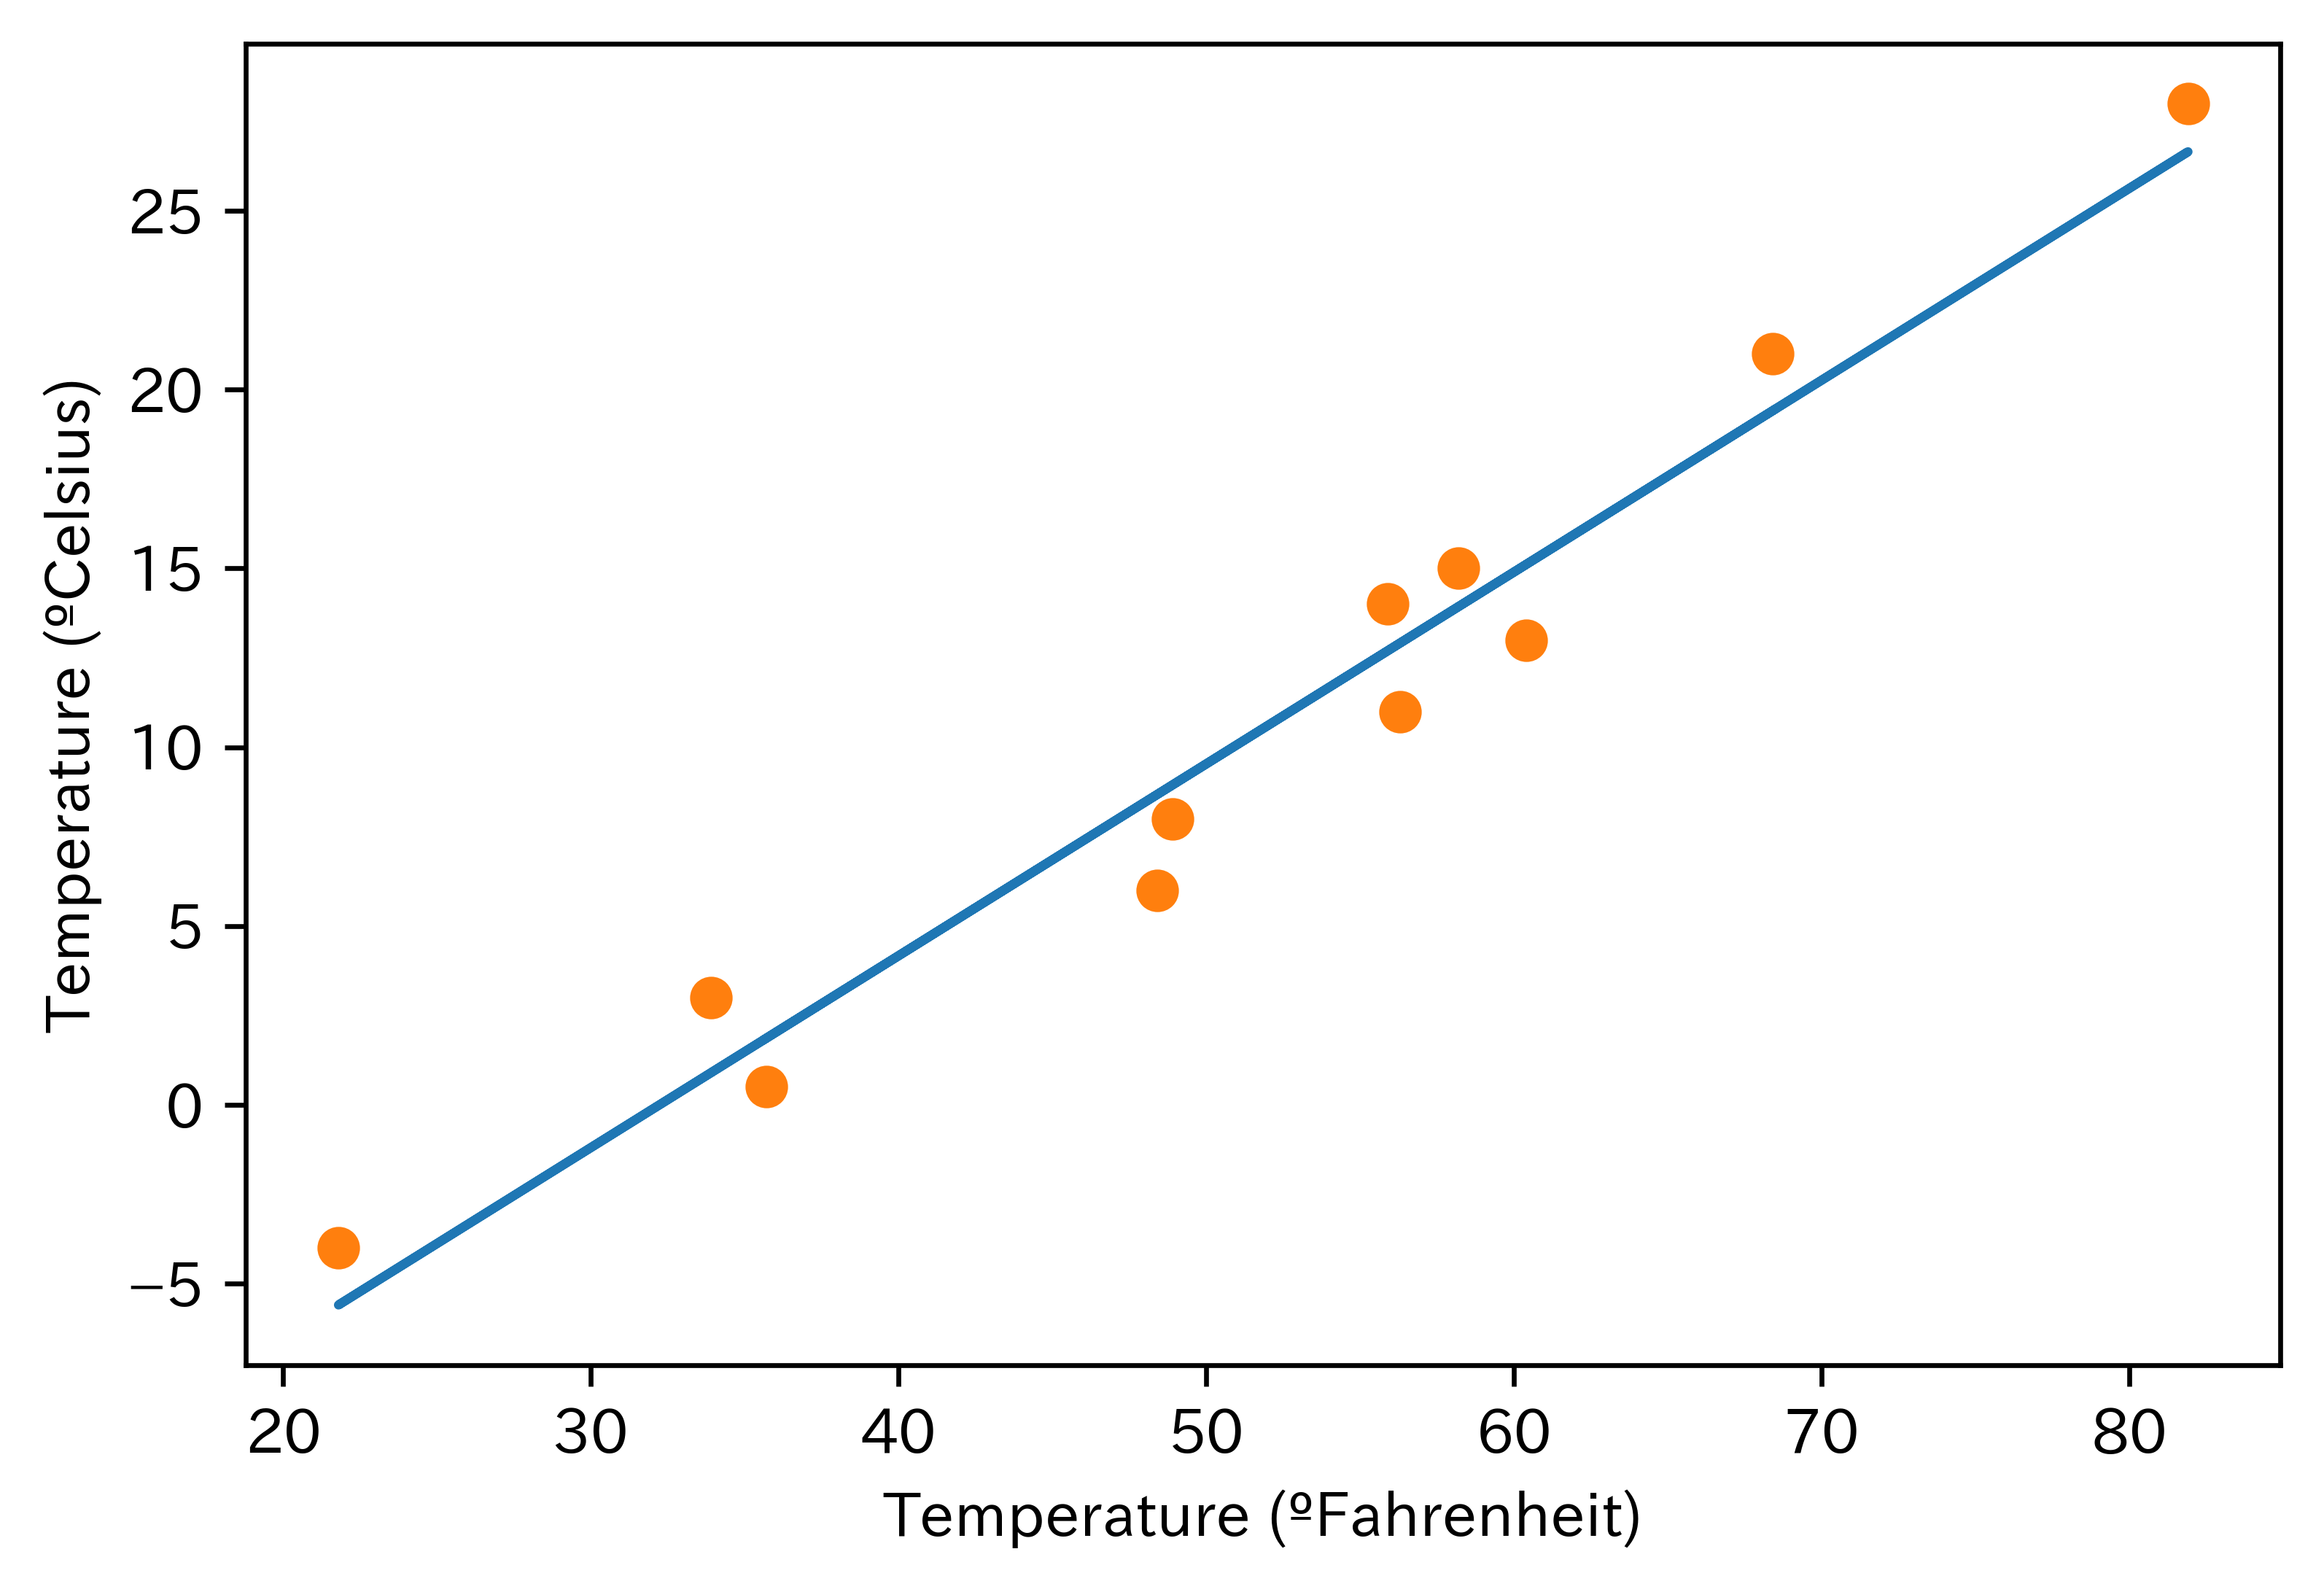

In [48]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (ºFahrenheit)")
plt.ylabel("Temperature (ºCelsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), "o")

# 5.5
## 5.5.1

In [49]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [50]:
params.grad is None

True

In [51]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [52]:
if params.grad is not None:
    params.grad.zero_()

In [57]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params

In [58]:
training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0], requires_grad=True), t_u=t_un, t_c=t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

## 5.5.2

In [59]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [60]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [61]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [62]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [63]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params

In [64]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [65]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_u, t_c = t_c)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927645


tensor([  0.5368, -17.3048], requires_grad=True)

In [66]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 1,  4,  0,  7,  9,  3, 10,  8,  5]), tensor([6, 2]))

In [67]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [73]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}")
    return params

In [74]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(n_epochs = 3000, optimizer = optimizer, params = params, train_t_u = train_t_un, val_t_u = val_t_un,
              train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training Loss 88.8426, Validation loss 42.2123
Epoch 2, Training Loss 40.6846, Validation loss 14.4383
Epoch 3, Training Loss 34.2247, Validation loss 12.5291
Epoch 500, Training Loss 8.3061, Validation loss 1.0848
Epoch 1000, Training Loss 3.7709, Validation loss 1.8114
Epoch 1500, Training Loss 2.9569, Validation loss 3.2044
Epoch 2000, Training Loss 2.8108, Validation loss 3.9893
Epoch 2500, Training Loss 2.7846, Validation loss 4.3568
Epoch 3000, Training Loss 2.7799, Validation loss 4.5188


tensor([  5.4915, -18.3051], requires_grad=True)

In [75]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}")
    return params

In [76]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss